In [1]:
# constant
DF_PATH = "../data/processed/1_preprocessed_df.pkl"
EXPORT_PATH = "../data/processed/2_feed_model.pkl"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [3]:
# Read Data 
df = pd.read_pickle(DF_PATH)

# what features we will feed to our model ?

In [4]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

> we can start with :  trip_distance, tpep_pickup_datetime, tpep_dropoff_datetime

## distance

In [5]:
df = df[(df["trip_distance"] < 23) &  (df["trip_distance"] > 0)]

> drop outliers for distance

# time

> tpep_pickup_datetime and tpep_dropoff_datetime

In [6]:
time_expand =  df.tpep_dropoff_datetime -  df.tpep_pickup_datetime


In [7]:
time_expand = time_expand.dt.total_seconds() # time delta
df["trip_time"] = time_expand / 60 # minutes

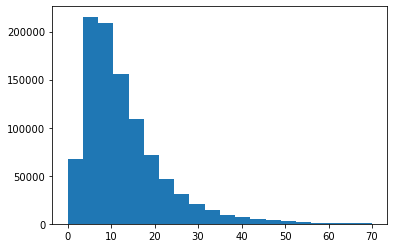

In [8]:
plt.hist(df["trip_time"],bins=20,range=(0, 70));

In [9]:
df[(df["trip_time"] > 55) |  (df["trip_time"] < 0)].count()[1]

7309

In [10]:
df = df[(df["trip_time"] < 55) &  (df["trip_time"] > 0)]

In [11]:
df.shape

(969954, 19)

## fare amonut

In [12]:
df[(df["fare_amount"] > 50) |  (df["fare_amount"] < 0)].count()[1]

27840

In [13]:
df[((df['fare_amount'] > 0)  & (df['fare_amount'] < 55 ))]['fare_amount'].describe()

count    962868.000000
mean         11.785585
std           9.249235
min           0.010000
25%           6.500000
50%           9.000000
75%          13.500000
max          54.800000
Name: fare_amount, dtype: float64

In [14]:
df[((df['fare_amount'] > 0)  & (df['fare_amount'] < 50 ))]['fare_amount'].describe()

count    941617.000000
mean         10.878046
std           7.082170
min           0.010000
25%           6.500000
50%           8.500000
75%          13.000000
max          49.700000
Name: fare_amount, dtype: float64

> with 50 as maximum we have more less STD

In [15]:
df = df[((df['fare_amount'] > 0)  & (df['fare_amount'] < 50 ))]

In [18]:
df.shape

(941617, 19)

## save data frame

In [19]:
df.to_pickle(EXPORT_PATH)